In [1]:
import json
import pandas as pd

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

### Задание

Что нужно сделать с датасетами?

1) разобраться, как его открыть и прочитать в google colab или jupyter notebook

2) сделать dataframe в pandas

3) сделать небольшой анализ: 

    1) какие данные представлены в датасете (какие columns в dataframe), 
    
    2) посчитать с помощью кода кол-во диалогов, 
    
    3) посчитать среднюю длину диалогов (сколько высказываний/предложений в среднем в одном диалоге), 
    
    4) подойдут ли диалоги для перевода (не являются ли диалоги слишком специфичными), 
    
    5) как отражены связи между высказываниями в датасете (это скорее для @Gloria Rozovskaya).
    
    + посмотреть распределение классов по датасету (по возможности построить график)

**Данные устроены так:**

есть 3 файла json: dev, test, train

в каждом из них по ключу data следующая структура:

по ключу title (для каждого файла значение соответсвенно dev, test или train) лежит список dialogues; 

в списке dialogues - словари, в каждом словаре следующие ключи:
- edus (список EDU каждого диалога, каждое EDU - словарь с ключами text и speaker)
- context (склеенные в одну строку элементы edus, speaker : text)
- qas (вопросы и ответы разметчиков; у каждого вопроса есть: id; question - сам текст вопроса; answers - список кусочков текста из context (?), где есть ответ на вопрос, и answer_start - число {возможно, с какого элемента в строке context начинается ответ}; is_impossible: true/false формат, если хоть один ответ на вопрос есть, то значение false, если список answers пуст, то true)
- relations (отношения между EDU в этом диалоге; у каждого отношения есть: x и y - Arg1 и Arg2 соответственно; type - тип отношения)

In [2]:
molweni_ds_dev = open('dev.json', 'r', encoding='utf-8')

In [3]:
data_dev = json.load(molweni_ds_dev)

In [4]:
len(data_dev['data']['dialogues'])

883

In [6]:
molweni_ds_test = open('test.json', 'r', encoding='utf-8')

In [7]:
data_test = json.load(molweni_ds_test)

In [8]:
len(data_test['data']['dialogues'])

100

In [10]:
molweni_ds_train = open('train.json', 'r', encoding='utf-8')

In [11]:
data_train = json.load(molweni_ds_train)

In [12]:
len(data_train['data']['dialogues'])

8771

#### Кол-во диалогов

In [14]:
len(data_dev['data']['dialogues']) + len(data_test['data']['dialogues']) + len(data_train['data']['dialogues'])

9754

#### Средняя длина диалогов 

In [15]:
avr_len_list = []

for data_set in [data_dev, data_test, data_train]:
    sum_len = 0
    for i in range(len(data_set['data']['dialogues'])):
        sum_len = sum_len + len(data_set['data']['dialogues'][i]['edus'])
    avr_len_set = sum_len/(len(data_set['data']['dialogues']))
    avr_len_list.append(avr_len_set)

avr_len_total = sum(avr_len_list)/len(avr_len_list)

print(round(avr_len_total, 2))

8.71


#### Подойдут ли диалоги для перевода (не являются ли диалоги слишком специфичными)?

В Molweni брали диалоги из Ubuntu Chat Corpus.

Ubuntu — это полностью бесплатная и открытая, простая в освоении операционная система (ОС), разработанная британской компанией Canonical Ltd. на базе дистрибутива Linux и Unix-подобной ОС Debian.

"Данные хорошо размечены, но диалоги не совсем подходят из-за специфичности (в них обсуждаются проблемы с Ubuntu)" @ Лида

## Наглядное представление данных  

In [16]:
dialogues = []
edus = []    
contexts = []
qas = []
relations = []

for data_set in [data_dev, data_test, data_train]:
    for x in range (len(data_set['data']['dialogues'])):
        dialogues.append('dialogue '+str(1+len(dialogues)))
        edus_raw = data_set['data']['dialogues'][x]['edus']
        edus_of_this_dialogue = []
        for y in range(len(edus_raw)):
            edu_dict = {"edu_number":y+1, "speaker":edus_raw[y]['speaker'], "text":edus_raw[y]['text']}
            edus_of_this_dialogue.append(edu_dict)
        edus.append(edus_of_this_dialogue)

        contexts.append(data_set['data']['dialogues'][x]['context'])

        qas.append(data_set['data']['dialogues'][x]['qas'])

        relations_raw = data_set['data']['dialogues'][x]['relations']
        relations_of_this_dialogue = [] 
        for z in range(len(relations_raw)):
            relations_dict = {"relation_number":z+1, "type":relations_raw[z]['type'], 
                              "Arg1":relations_raw[z]['x']+1, "Arg2":relations_raw[z]['y']+1}
            relations_of_this_dialogue.append(relations_dict)
        relations.append(relations_of_this_dialogue)

#### Распределение классов по датасету

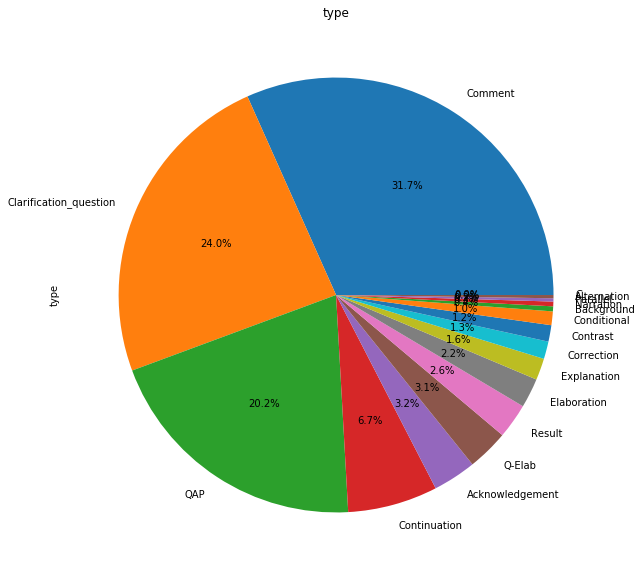

In [35]:
all_relation_types = []
for dlg in relations:
    for rltn in dlg:
        all_relation_types.append(rltn['type'])

table_of_relations = pd.DataFrame(all_relation_types, columns=['type'])
plt.figure(figsize=(10, 10))
table_of_relations['type'].value_counts().plot(kind='pie', autopct='%1.1f%%');
plt.title('type');

## Таблица

In [17]:
tabledata = []
for j in range(len(dialogues)):
    tabledata.append([dialogues[j], edus[j], contexts[j], qas[j], relations[j]])

In [18]:
pd.DataFrame(tabledata, columns=['dialogue N', 'EDUs', 'context', 'QAs', 'relations'])

,dialogue N,EDUs,context,QAs,relations
0,dialogue 1,"[{'edu_number': 1, 'speaker': 'dv_', 'text': '...",dv_: if you have the newest nvidia drivers ( t...,[{'question': 'What are the ubuntu ones basica...,"[{'relation_number': 1, 'type': 'Clarification..."
1,dialogue 2,"[{'edu_number': 1, 'speaker': 'benkong2', 'tex...",benkong2: sevas apt is installing the linux-he...,[{'question': 'What is the last thing occy wan...,"[{'relation_number': 1, 'type': 'QAP', 'Arg1':..."
2,dialogue 3,"[{'edu_number': 1, 'speaker': 'nomic', 'text':...",nomic: is that a set of libraries danbhfive: y...,"[{'question': 'Where does it need to open ?', ...","[{'relation_number': 1, 'type': 'Comment', 'Ar..."
3,dialogue 4,"[{'edu_number': 1, 'speaker': 'Dougie', 'text'...",dougie: wpa_action wpa_cli wpa_passphrase wpa_...,"[{'question': 'What does Dougie make sure ?', ...","[{'relation_number': 1, 'type': 'Clarification..."
4,dialogue 5,"[{'edu_number': 1, 'speaker': 'specialbuddy', ...",specialbuddy: well i want to know why i ca n't...,[{'question': 'What is speciakbuddy's question...,"[{'relation_number': 1, 'type': 'Clarification..."
5,dialogue 6,"[{'edu_number': 1, 'speaker': 'benkong2', 'tex...",benkong2: sevas apt is installing the linux-he...,[{'question': 'What is the last thing occy wan...,"[{'relation_number': 1, 'type': 'QAP', 'Arg1':..."
6,dialogue 7,"[{'edu_number': 1, 'speaker': 'ava', 'text': '...",ava: could it be because i am using the wrong ...,[{'question': 'What is the cause of the ava er...,"[{'relation_number': 1, 'type': 'Comment', 'Ar..."
7,dialogue 8,"[{'edu_number': 1, 'speaker': 'Benjamin_L', 't...",benjamin_l: is it normal that ram usage when r...,[{'question': 'What is the problem of Benjamin...,"[{'relation_number': 1, 'type': 'QAP', 'Arg1':..."
8,dialogue 9,"[{'edu_number': 1, 'speaker': 'Brando753', 'te...",brando753: because i have a server `` p action...,[{'question': 'how to see which is xp and whic...,"[{'relation_number': 1, 'type': 'Continuation'..."
9,dialogue 10,"[{'edu_number': 1, 'speaker': 'Rush3d', 'text'...","rush3d: hmm ok frots , try updating your drive...",[{'question': 'Which edition does Frots try wi...,"[{'relation_number': 1, 'type': 'QAP', 'Arg1':..."


## Таблица в CSV

In [19]:
all_data_dict = {'dialogue N':dialogues, 'EDUs':edus, 'context':contexts, 'QAs':qas, 'relations':relations}

In [20]:
data_frame = pd.DataFrame(all_data_dict)

print (data_frame)

         dialogue N                                               EDUs  \
0        dialogue 1  [{'edu_number': 1, 'speaker': 'dv_', 'text': '...   
1        dialogue 2  [{'edu_number': 1, 'speaker': 'benkong2', 'tex...   
2        dialogue 3  [{'edu_number': 1, 'speaker': 'nomic', 'text':...   
3        dialogue 4  [{'edu_number': 1, 'speaker': 'Dougie', 'text'...   
4        dialogue 5  [{'edu_number': 1, 'speaker': 'specialbuddy', ...   
5        dialogue 6  [{'edu_number': 1, 'speaker': 'benkong2', 'tex...   
6        dialogue 7  [{'edu_number': 1, 'speaker': 'ava', 'text': '...   
7        dialogue 8  [{'edu_number': 1, 'speaker': 'Benjamin_L', 't...   
8        dialogue 9  [{'edu_number': 1, 'speaker': 'Brando753', 'te...   
9       dialogue 10  [{'edu_number': 1, 'speaker': 'Rush3d', 'text'...   
10      dialogue 11  [{'edu_number': 1, 'speaker': 'rabiddachshund'...   
11      dialogue 12  [{'edu_number': 1, 'speaker': 'seife', 'text':...   
12      dialogue 13  [{'edu_number': 1

In [21]:
data_frame.to_csv('molweni_data_table.csv')